# Agrupamento Particionado
## usamos o Kmeans para recomendar filmes 
### a partir do Kmeans podemos recomendar filmes semelhantes ao gosto de uma pessoa

In [1]:
import pandas as pd

In [2]:
uri = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# categoriza a partir das string a coluna generos
generos = filmes.genres.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# concatena os arrays lado a lado
filmes = pd.concat([filmes,generos],axis = 1)
filmes.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# escala os generos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
print(generos_escalados[0])

/home/pedro/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


[-0.05917995 -0.48060698  2.59101927  3.86579274  3.69752441  1.26242494
 -0.37463158 -0.21748944 -0.90024672  3.3920166  -0.09492563 -0.3340552
 -0.12839708 -0.18841895 -0.24998637 -0.44263346 -0.33443476 -0.49125897
 -0.20201972 -0.13206534]


/home/pedro/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## agrupando em 3 clusters

In [6]:
# agrupa os generos dos filmes
from sklearn.cluster import KMeans

# agrupa em n_clusters grupos diferentes
modelo = KMeans(n_clusters = 3)
modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
# olha os centroides de cada atributo generos para cada um dos 3 clusters

print(generos.columns)
print(modelo.cluster_centers_)

Index([u'(no genres listed)', u'Action', u'Adventure', u'Animation',
       u'Children', u'Comedy', u'Crime', u'Documentary', u'Drama', u'Fantasy',
       u'Film-Noir', u'Horror', u'IMAX', u'Musical', u'Mystery', u'Romance',
       u'Sci-Fi', u'Thriller', u'War', u'Western'],
      dtype='object')
[[-0.05917995 -0.18455955  1.01747916  1.92139885  3.14097718  0.30452377
  -0.32719386 -0.21123565 -0.5816123   1.06500664 -0.09492563 -0.27787541
   0.2211731   0.52531361 -0.12303221 -0.25666272 -0.01061451 -0.46828765
  -0.17525592 -0.07203358]
 [ 0.02169129 -0.4802477  -0.27487073 -0.19388173 -0.27045122  0.05545894
  -0.04842098  0.07566383  0.13899026 -0.14224797  0.02584707  0.04635881
  -0.11507111 -0.01111212  0.02843214  0.10539001 -0.15116222 -0.06627826
  -0.02279348 -0.00670797]
 [-0.05917995  1.93477846  0.63814133 -0.05279125 -0.26614523 -0.34175262
   0.32400024 -0.20442537 -0.29463923  0.10527981 -0.06032068 -0.06322728
   0.35270681 -0.17649113 -0.05857727 -0.3004314   0.58

In [8]:
# convertemos o conjunto de grupos para um dataframe
# e renomeamos as colunas para o nome dos generos

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns = generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.184560,1.017479,1.921399,3.140977,0.304524,-0.327194,-0.211236,-0.581612,1.065007,-0.094926,-0.277875,0.221173,0.525314,-0.123032,-0.256663,-0.010615,-0.468288,-0.175256,-0.072034
1,0.021691,-0.480248,-0.274871,-0.193882,-0.270451,0.055459,-0.048421,0.075664,0.138990,-0.142248,0.025847,0.046359,-0.115071,-0.011112,0.028432,0.105390,-0.151162,-0.066278,-0.022793,-0.006708
2,-0.059180,1.934778,0.638141,-0.052791,-0.266145,-0.341753,0.324000,-0.204425,-0.294639,0.105280,-0.060321,-0.063227,0.352707,-0.176491,-0.058577,-0.300431,0.589153,0.452023,0.161390,0.056043


In [9]:
# plotamos um grafico de barras

grupos.transpose().plot.bar(subplots=True,
                           figsize=(25,25),
                           sharex=False)

# Control + Enter para plotar

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7facbcc513d0>,
      dtype=object)

In [10]:
# reduzimos o conjunto de generos escalados para 2 dimensões
# esse metodo eh lento

from sklearn.manifold import TSNE
tsne = TSNE()
visual = tsne.fit_transform(generos_escalados)
visual

array([[-13.308651 ,  51.608875 ],
       [-21.96663  ,  40.100124 ],
       [ 14.08959  , -32.17644  ],
       ...,
       [ 17.106924 ,  -1.7083658],
       [ 45.229427 ,  -1.9553542],
       [-15.331652 ,  17.000092 ]], dtype=float32)

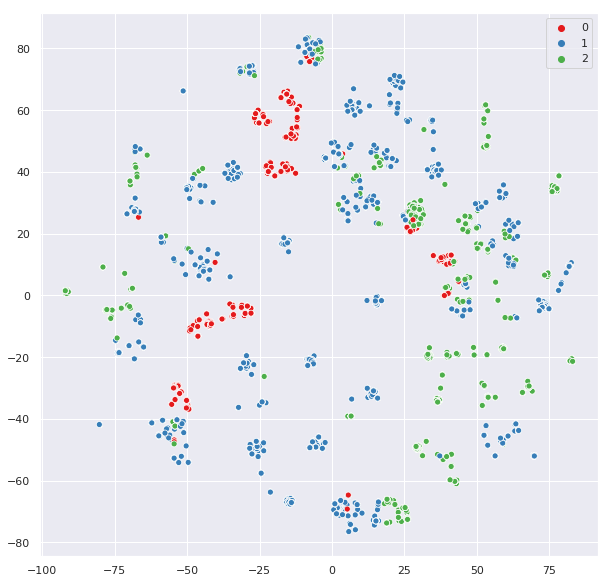

In [11]:
# plotamos os generos escalados

import seaborn as sns

sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x = visual[:,0],
                y = visual[:,1],
                hue = modelo.labels_,
                palette = sns.color_palette('Set1',3))

# quando reduzimos a dimensionalidade - 
# perdemos informações sobre como os dados estão dispostos. 
# eh visivel isso pois existem pontos de cores diferentes proximos entre si

## agrupando em 20 clusters

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7facbc28ac90>,
      dtype=object)

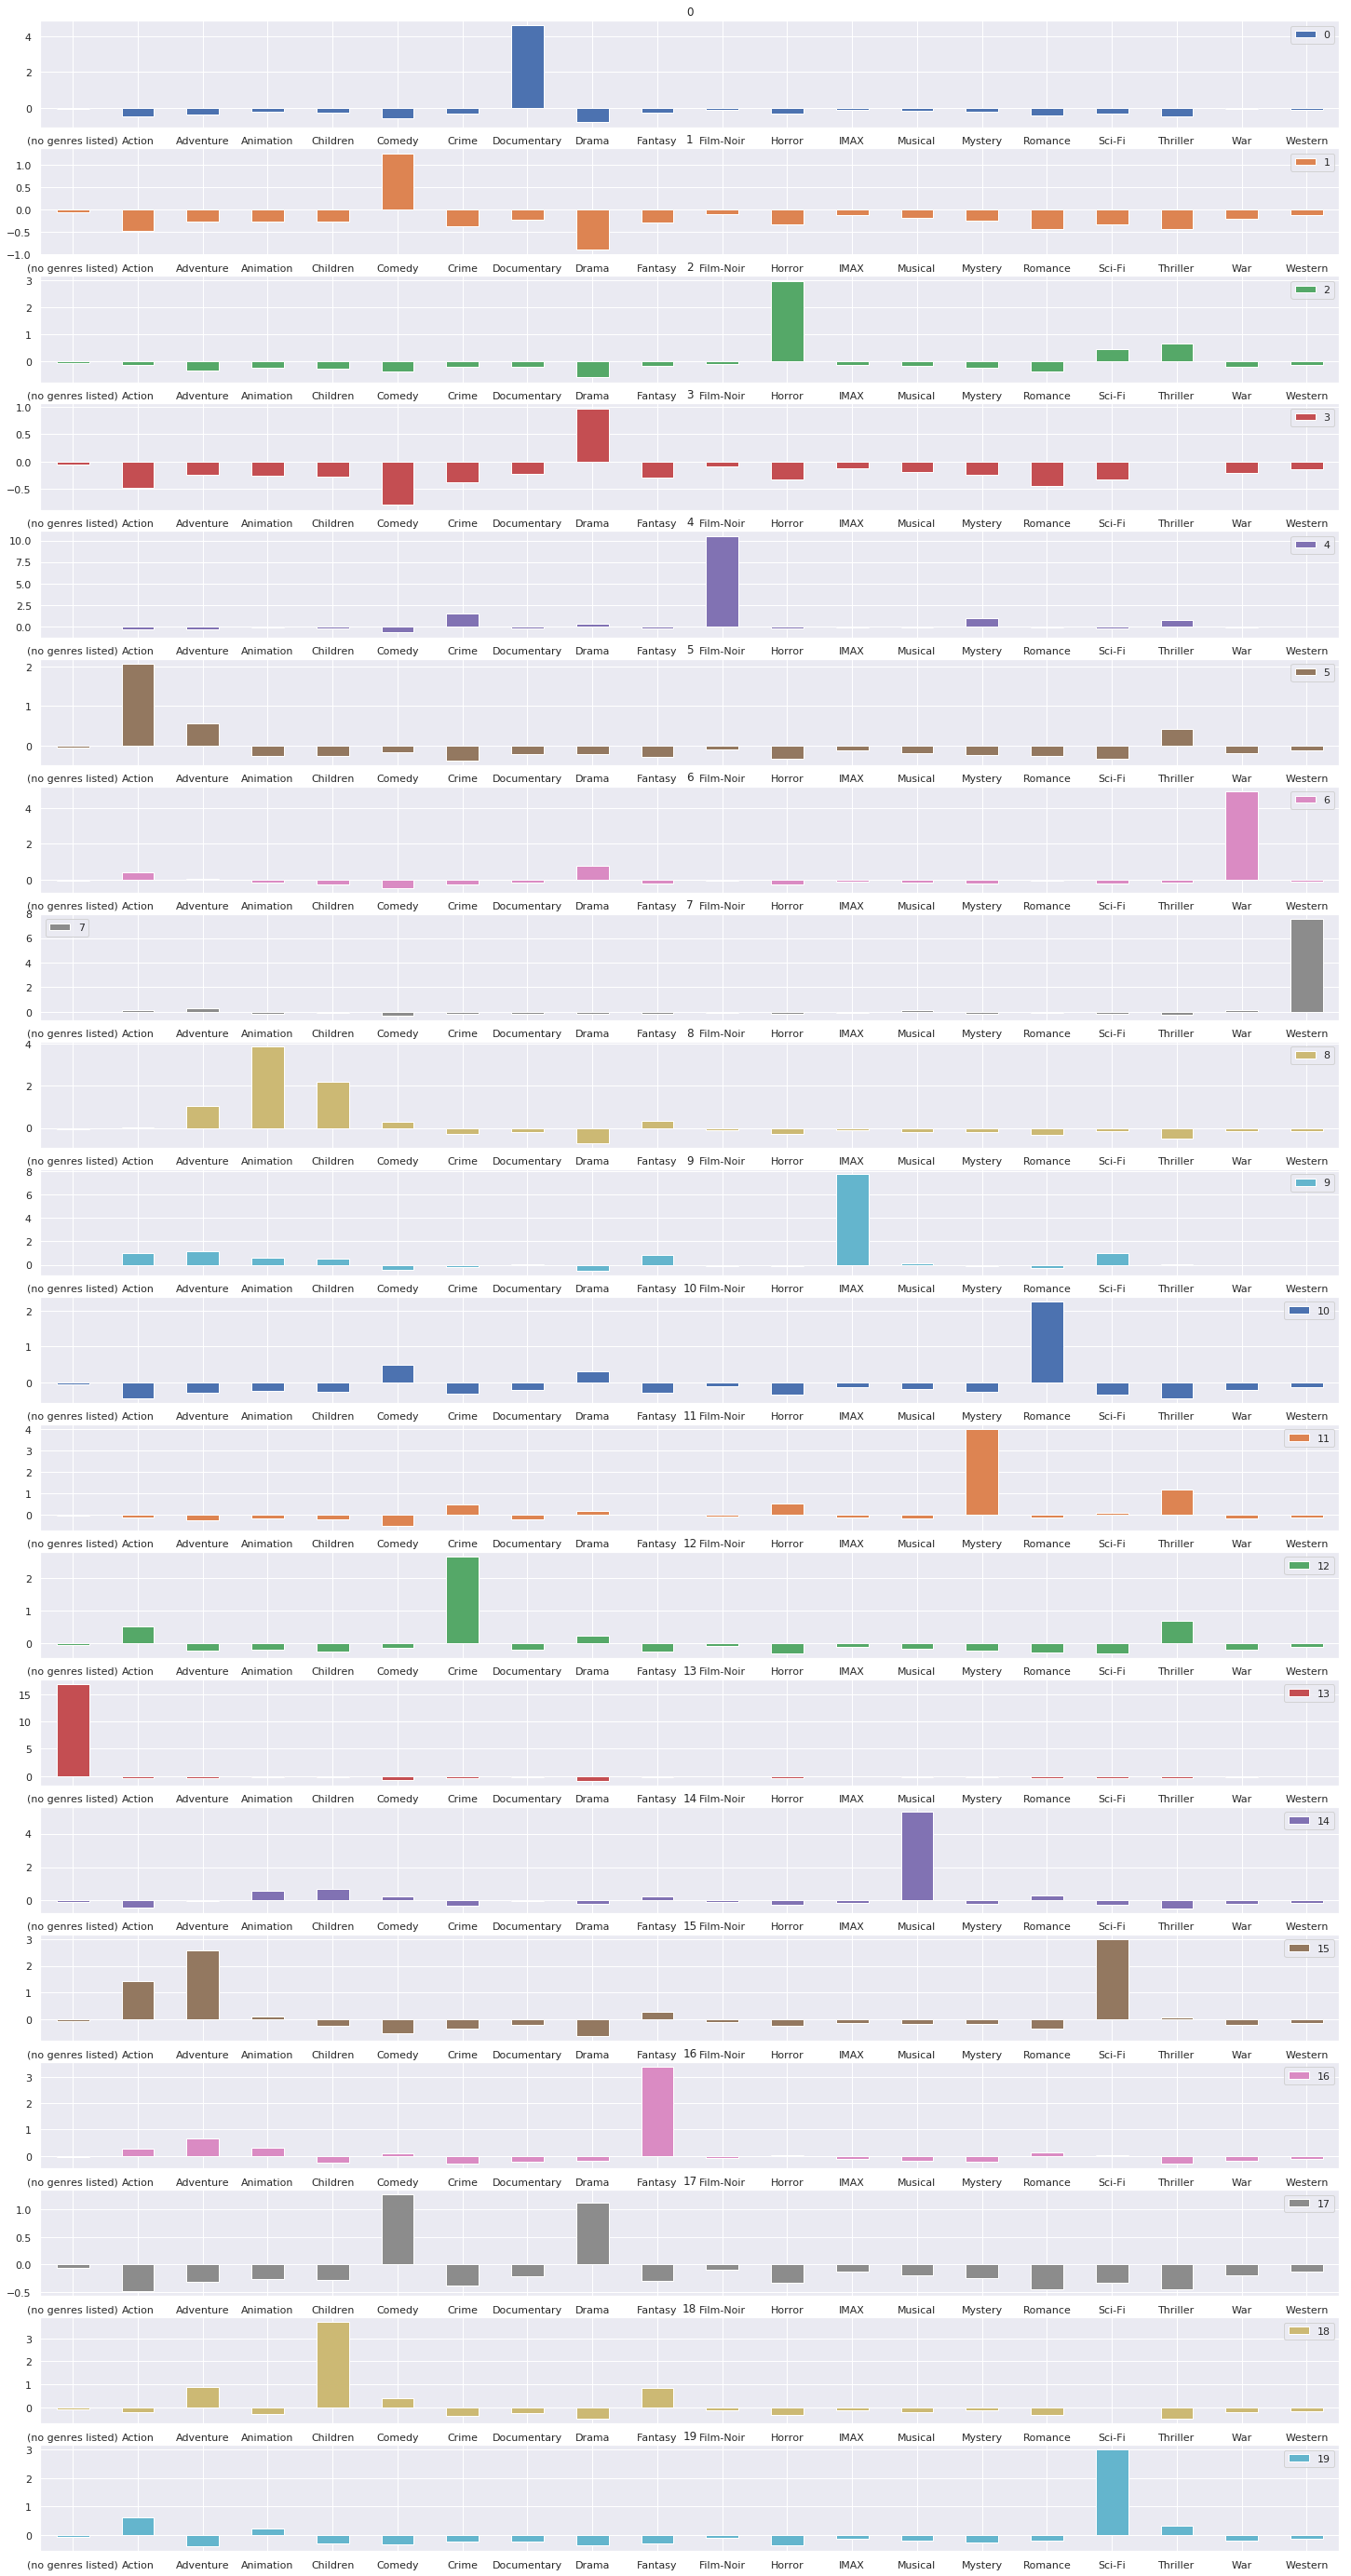

In [12]:
# agrupa os generos dos filmes
# agora usamos 20 clusters

from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 20)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_,
                     columns = generos.columns)
grupos.transpose().plot.bar(subplots=True,
                           figsize=(25,50),
                           sharex=False,
                           rot=0)


# observe os valores plotados abaixo
# note que existem grupos nao tao bem definidos

In [13]:
# definimos uma funcao para nos retornar o erro do agrupamento
# o erro eh justamente a distancia media dos pontos ( filmes ) do centroid ( classificacao de filmes no grupo)

def km(numero_clusters,generos):
    modelo = KMeans(n_clusters = numero_clusters)
    modelo.fit(generos)
    erro = modelo.inertia_
    
    return [numero_clusters,erro]

# calculamos o erro para verificar se o numero de centroides escolhido eh o ideal para os dados do problema
# isso eh importante pois, se escolhermos o numero de centroides de forma errada, poderemos classificar os filmes de 
# maneira errada

In [14]:
resultado = [km(nm,generos_escalados) for nm in range(1,40 + 1)]

In [15]:
resultado_dataframe = pd.DataFrame(resultado,
                                  columns = ['grupos','inertia'])
resultado_dataframe

,grupos,inertia
0,1,194840.000000
1,2,179664.999079
2,3,166152.838304
3,4,157313.053274
4,5,148167.968887
5,6,139110.791192
6,7,127803.369489
7,8,120692.906814
8,9,109658.662314
9,10,103723.235750


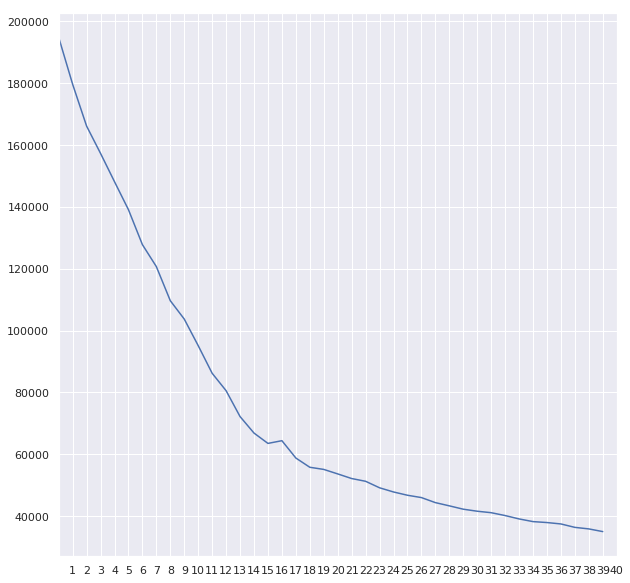

In [16]:
resultado_dataframe.inertia.plot(xticks = resultado_dataframe.grupos)

# usamos o elbow method para definimos o numero ideal de clusters
# no caso ---> 15 clusters

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7facac234a50>,
      dtype=object)

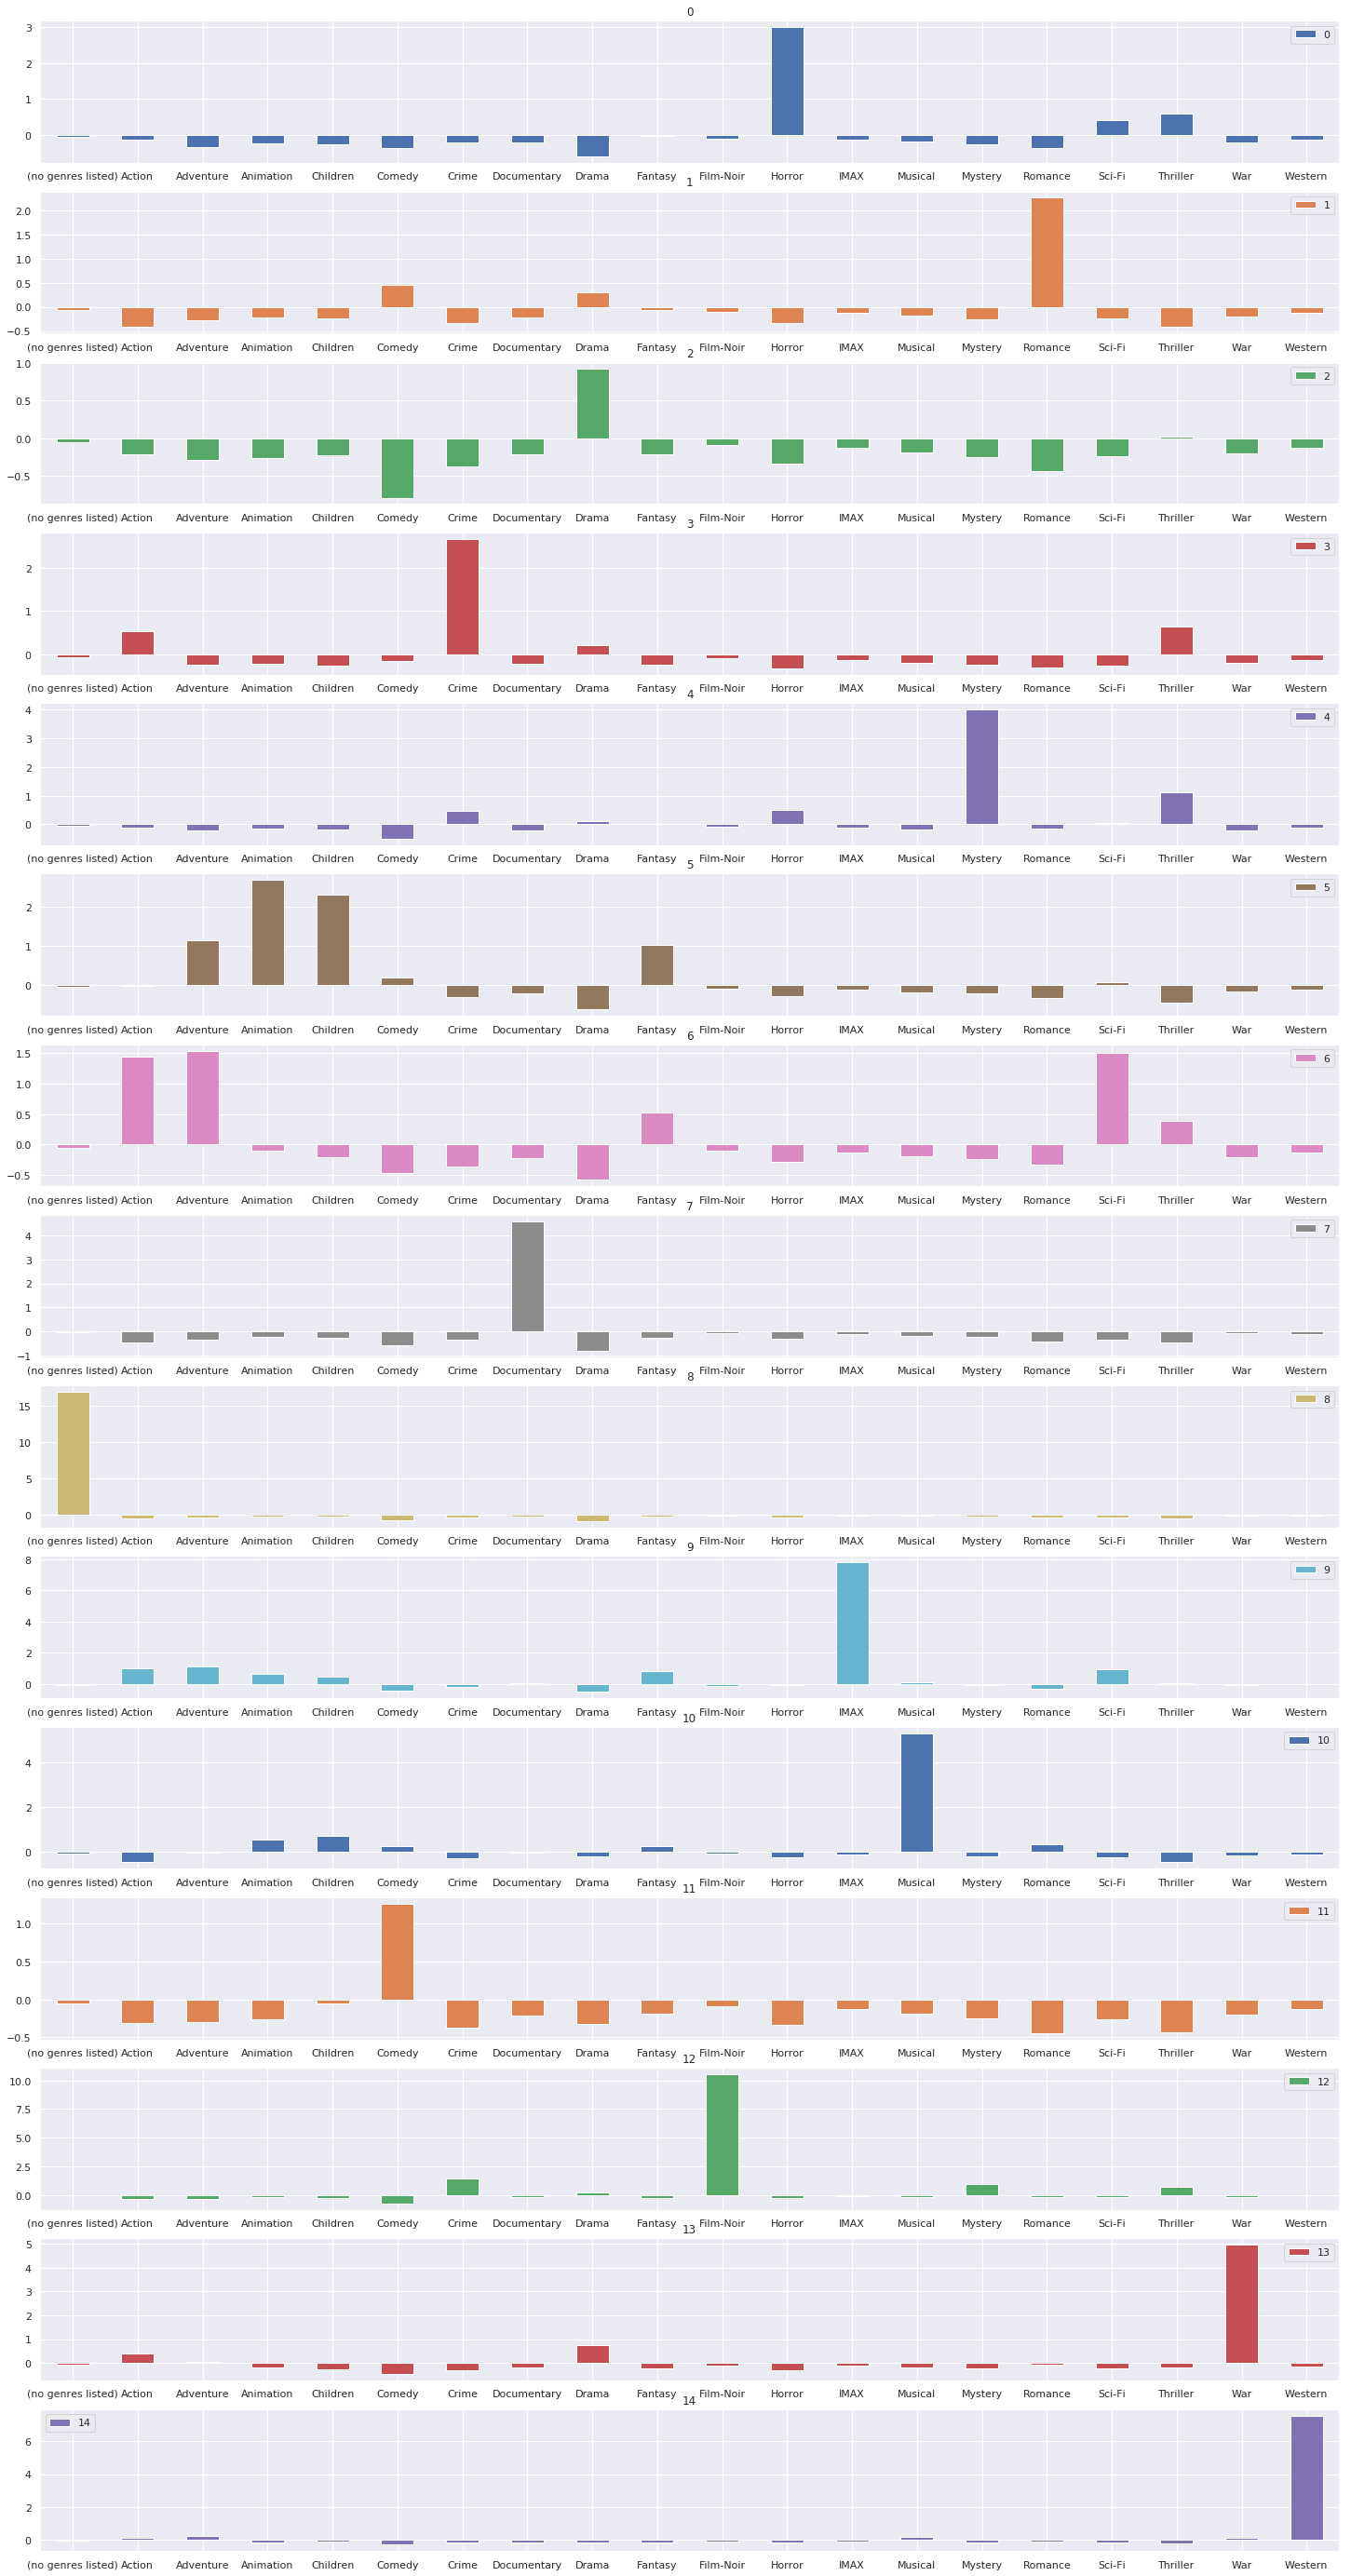

In [17]:
# treinamos o modelo novamente ... mas agora para 15 clusters

# agrupa em 15 grupos diferentes
modelo = KMeans(n_clusters = 15)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_,
                     columns = generos.columns)
grupos.transpose().plot.bar(subplots=True,
                           figsize=(25,50),
                           sharex=False,
                           rot=0)

# os resultados sao melhores em relacao quando usamos 20 grupos
# os grupos estao mais bem definidos

# Agrupamento hierarquico